In [3]:
# Dataset 2 : Movies

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import MinMaxScaler
# model 
from sklearn.mixture import GaussianMixture
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']



# define our scaler
scaler = MinMaxScaler()
# scale down our data
df_scaled = scaler.fit_transform(df)

X_scaled = scaler.fit_transform(X)

In [15]:
gm_bic= []
gm_score=[]
for i in range(2,16):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000,random_state = 32).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: 636.2735567910992
Log-likelihood score for number of cluster(s) 2: 0.0007181086830452771
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: 569.3272016195058
Log-likelihood score for number of cluster(s) 3: 0.15056492969336321
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: 543.9688643985999
Log-likelihood score for number of cluster(s) 4: 0.28441635918418595
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: 46.39863468013664
Log-likelihood score for number of cluster(s) 5: 0.5998877473279154
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -3489.5625286938257
Log-likelihood score for number of cluster(s) 6: 2.0839710330314523

/var/folders/ry/8803myjd0q12dyd2h81ryjcm0000gn/T/ipykernel_42023/1457359474.py:3: RuntimeWarning: invalid value encountered in log
  plt.scatter(x=[i for i in range(2,16)],y=np.log(gm_bic),s=150,edgecolor='k')


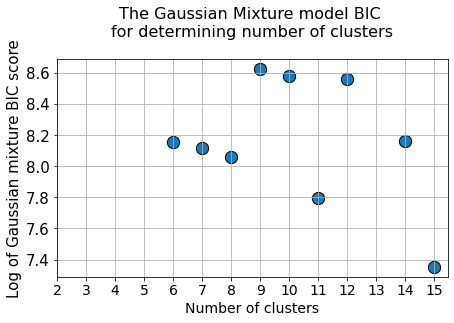

In [18]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,16)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,16)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [16]:
gm_aic= []
gm_aic_score=[]
for i in range(2,15):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000,random_state = 32).fit(X_scaled)
    print("AIC for number of cluster(s) {}: {}".format(i,gm.aic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_aic.append(-gm.aic(X_scaled))
    gm_aic_score.append(gm.score(X_scaled))

AIC for number of cluster(s) 2: 176.13291742408228
Log-likelihood score for number of cluster(s) 2: 0.0007181086830452771
----------------------------------------------------------------------------------------------------
AIC for number of cluster(s) 3: -123.46881720274433
Log-likelihood score for number of cluster(s) 3: 0.15056492969336321
----------------------------------------------------------------------------------------------------
AIC for number of cluster(s) 4: -381.4825338788835
Log-likelihood score for number of cluster(s) 4: 0.28441635918418595
----------------------------------------------------------------------------------------------------
AIC for number of cluster(s) 5: -1111.70814305258
Log-likelihood score for number of cluster(s) 5: 0.5998877473279154
----------------------------------------------------------------------------------------------------
AIC for number of cluster(s) 6: -4880.324685881776
Log-likelihood score for number of cluster(s) 6: 2.0839710330314

/var/folders/ry/8803myjd0q12dyd2h81ryjcm0000gn/T/ipykernel_42023/2710612864.py:3: RuntimeWarning: invalid value encountered in log
  plt.scatter(x=[i for i in range(2,15)],y=np.log(gm_aic),s=150,edgecolor='k')


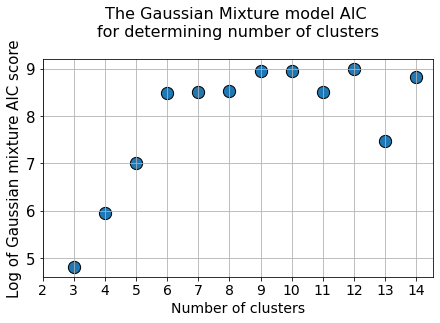

In [17]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model AIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=np.log(gm_aic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture AIC score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [9]:
# score of the clustering

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import completeness_score
for i in range(2,15):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000,random_state = 32).fit(X_scaled)
    y_pred1 = gm.predict(X_scaled)

    print('v_measure_score {} :{}'.format(i,v_measure_score(y,y_pred1,beta =1.0)))
    #print('homogeneity_score {} :{}'.format(i,homogeneity_score(y,y_pred1)))
    #print('completeness_score {} :{}'.format(i,completeness_score(y,y_pred1)))

v_measure_score 2 :0.03229453610190983
v_measure_score 3 :0.02333631441326436
v_measure_score 4 :0.019488322561579466
v_measure_score 5 :0.023034828611401464
v_measure_score 6 :0.02776579071539405
v_measure_score 7 :0.02448213271185801
v_measure_score 8 :0.025616210769886086
v_measure_score 9 :0.02812743302686465
v_measure_score 10 :0.029823022596301676
v_measure_score 11 :0.02544766043843463
v_measure_score 12 :0.027752679952500418
v_measure_score 13 :0.0218313969944395
v_measure_score 14 :0.024581569819062784


time for running the algorithm = 85.88314836499922 s


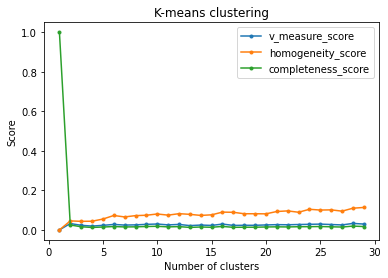

In [19]:
# score of the clustering

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import completeness_score

v_measure_score_list = []
homogeneity_score_list = []
completeness_score_list = []

time1 = time.perf_counter()

for i in range(1,30):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000,random_state = 32).fit(X_scaled)
    y_pred1 = gm.predict(X_scaled)

    v_measure_score_list.append(v_measure_score(y,y_pred1,beta =1.0))
    homogeneity_score_list.append(homogeneity_score(y,y_pred1))
    completeness_score_list.append(completeness_score(y,y_pred1))
    
time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')

number_of_clusters = [i for i in range(1,30)]
fig, ax = plt.subplots()
ax.set_title('K-means clustering')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score')
ax.plot(number_of_clusters, v_measure_score_list, marker=".", label="v_measure_score")
ax.plot(number_of_clusters, homogeneity_score_list, marker=".", label="homogeneity_score")
ax.plot(number_of_clusters, completeness_score_list, marker=".", label="completeness_score")
ax.legend()
plt.show()

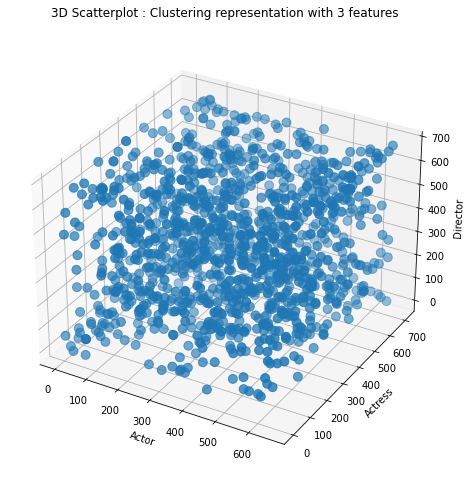

In [11]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection ='3d')

sctt = ax.scatter(pd.DataFrame(df, columns =['Actor']),
                    pd.DataFrame(df, columns =['Actress']),
                    pd.DataFrame(df, columns =['Director']),
                    s=80)

plt.title("3D Scatterplot : Clustering representation with 3 features",pad = 20)
ax.set_xlabel('Actor')
ax.set_ylabel('Actress')
ax.set_zlabel('Director')
plt.savefig('3d_scatterplot.png')

In [24]:
gm = GaussianMixture(n_components=3,n_init=10,tol=1e-3,max_iter=1000,random_state = 32).fit(X_scaled)
X_gm = gm.fit_predict(X_scaled)

b = io.open('Movie Dataset.csv', encoding='latin-1')
df_cluster = pd.read_csv(b)
df = df.take([i for i in range(1300)], axis = 0)
df_cluster = df_cluster.apply(LabelEncoder().fit_transform)

df_new = pd.DataFrame(X_gm, columns =['cluster'] )
df_cluster.loc[:,"cluster"] = df_new.cluster
print(df_cluster.head())

# save the data
df_cluster.to_csv('Movie_EM.csv', index=False)

df_cluster.head()
print(df_cluster.shape)

   Year  Length  Title  Subject  Actor  Actress  Director  Popularity  Awards  \
0    68      71   1486        2     33        0         8          68       0   
1    69      73    680        2     74        0         8          68       0   
2    61      64    389        6    713        1       158          79       0   
3    57      82    362        0    137        1       404           6       0   
4    56      54    383        4    266        1       435          14       0   

   cluster  
0      1.0  
1      1.0  
2      2.0  
3      0.0  
4      0.0  
(1659, 10)
